In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data =pd.read_csv(r"C:\Users\rajse\Downloads\deliverytime.csv\deliverytime.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [8]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [9]:
R = 6371
def deg_to_rad(degrees):
    return degrees*(np.pi/180)

In [10]:
def dist(lat1,lon1,lat2,lon2):
    d_lat = deg_to_rad(lat2 - lat1)
    d_lon = deg_to_rad(lon2 - lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1))*np.cos(deg_to_rad(lat2))*np.sin(d_lon/2)**2
    c = 2*np.arctan(np.sqrt(a),np.sqrt(1-a))
    return R*c

In [11]:
data['distance'] = dist(data['Restaurant_latitude'],data['Restaurant_longitude'],data['Delivery_location_latitude'],data['Delivery_location_longitude'])

In [12]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183504
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790400
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210137
...,...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32,1.489846
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36,11.007731
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16,4.657195
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26,6.232392


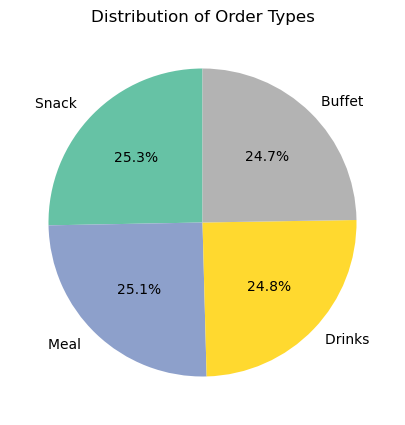

In [17]:
# Pie chart for Type of Order
plt.figure(figsize=(8, 5))
data["Type_of_order"].value_counts().plot.pie(autopct="%1.1f%%", cmap="Set2", startangle=90)
plt.title("Distribution of Order Types")
plt.ylabel("")
plt.show()

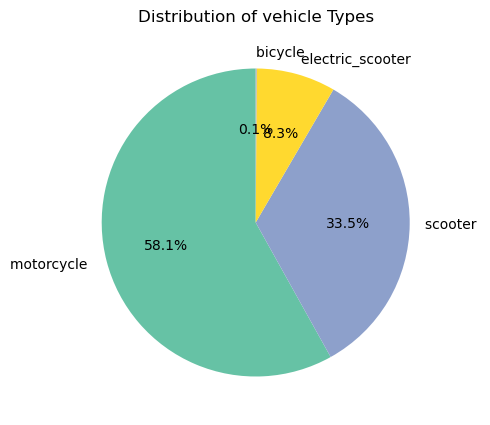

In [26]:
# Pie chart for Type of Vehicle
plt.figure(figsize=(8, 5))
data["Type_of_vehicle"].value_counts().plot.pie(autopct="%1.1f%%", cmap="Set2", startangle=90)
plt.title("Distribution of vehicle Types")
plt.ylabel("")
plt.show()

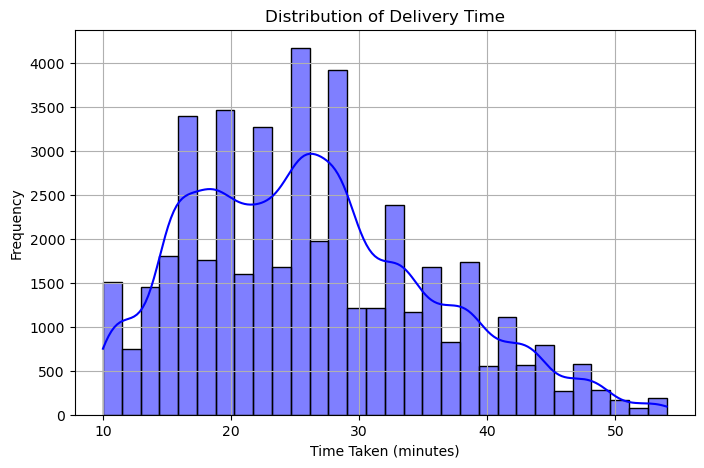

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Time_taken(min)"], bins=30, kde=True, color="blue")
plt.title("Distribution of Delivery Time")
plt.xlabel("Time Taken (minutes)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

C:\Users\rajse\AppData\Local\Temp\ipykernel_17924\1138983932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Type_of_order", y="Time_taken(min)", palette="Set2")


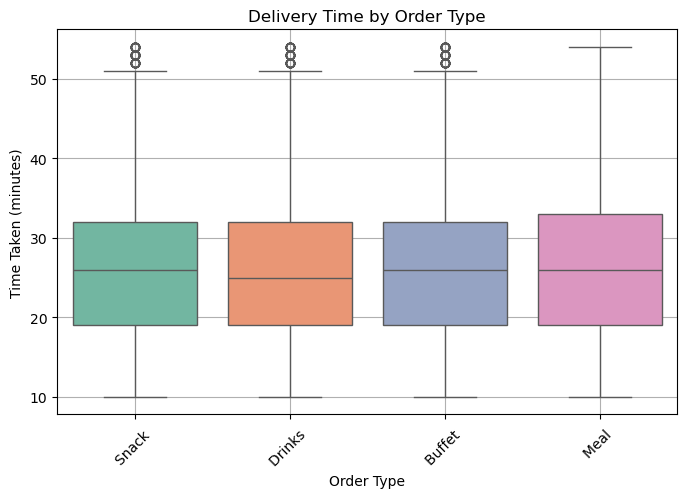

In [20]:
# Boxplot of Time Taken by Order Type
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="Type_of_order", y="Time_taken(min)", palette="Set2")
plt.title("Delivery Time by Order Type")
plt.xlabel("Order Type")
plt.ylabel("Time Taken (minutes)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

C:\Users\rajse\AppData\Local\Temp\ipykernel_17924\71897660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Type_of_vehicle", y="Time_taken(min)", palette="Set2")


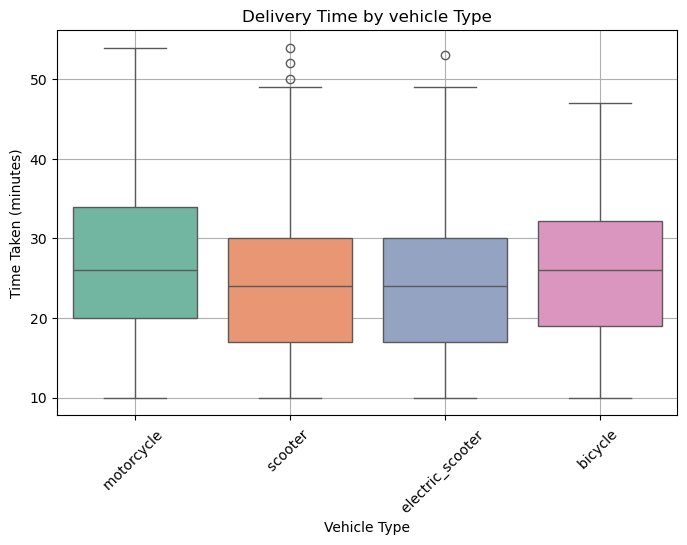

In [22]:
# Boxplot of Time Taken by Vehicle Type
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="Type_of_vehicle", y="Time_taken(min)", palette="Set2")
plt.title("Delivery Time by vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Time Taken (minutes)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

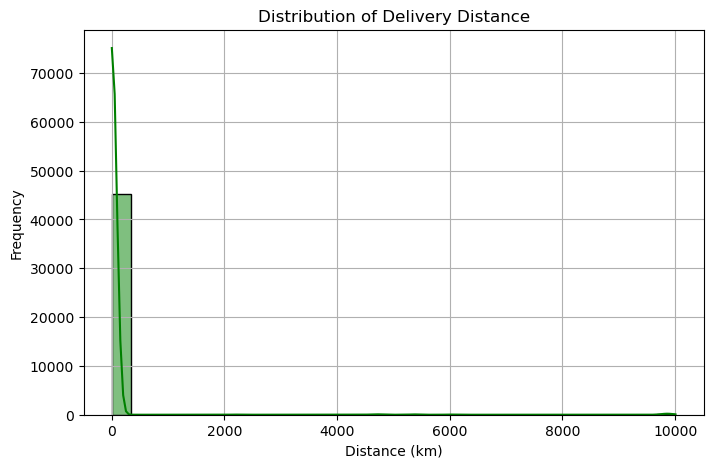

In [24]:
# Histogram of Delivery Time vs Distance
plt.figure(figsize=(8, 5))
sns.histplot(data["distance"], bins=30, kde=True, color="green")
plt.title("Distribution of Delivery Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [25]:
data = data[data["distance"] <= 50]

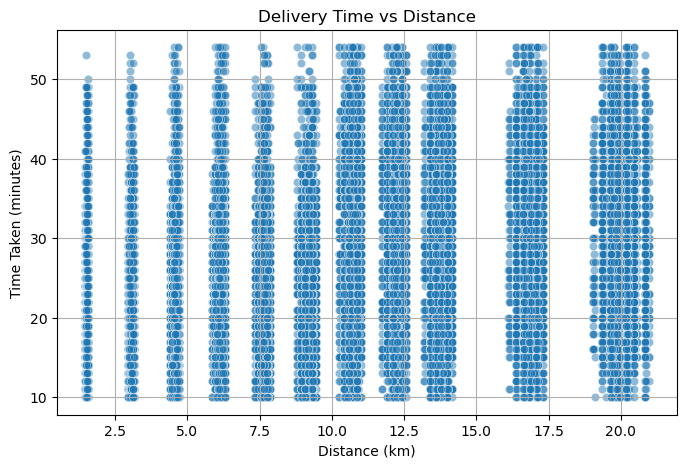

In [27]:
# Scatter plot of Delivery Time vs Distance
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="distance", y="Time_taken(min)", alpha=0.5)
plt.title("Delivery Time vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Time Taken (minutes)")
plt.grid()
plt.show()

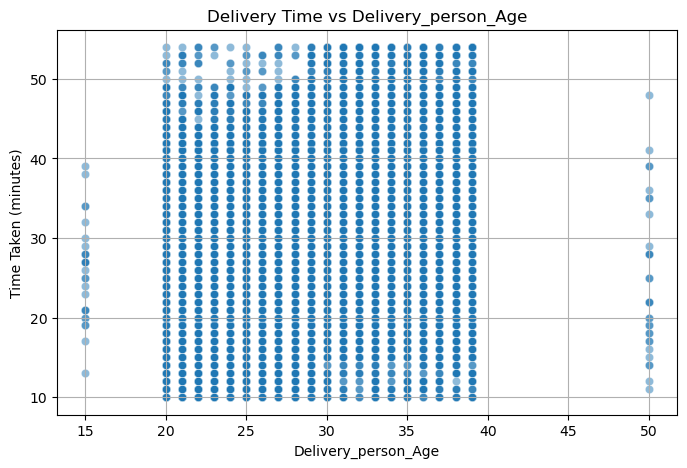

In [29]:
# Scatter plot of Delivery Time vs Delivery_person_Age
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="Delivery_person_Age", y="Time_taken(min)", alpha=0.5)
plt.title("Delivery Time vs Delivery_person_Age")
plt.xlabel("Delivery_person_Age")
plt.ylabel("Time Taken (minutes)")
plt.grid()
plt.show()

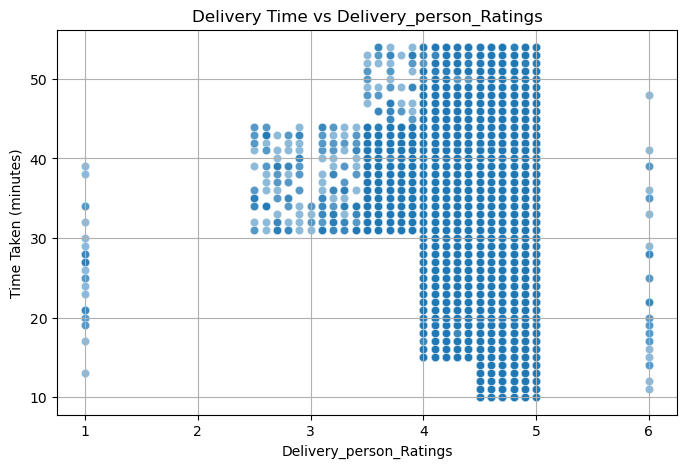

In [30]:
# Scatter plot of Delivery Time vs Delivery_person_Ratings
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="Delivery_person_Ratings", y="Time_taken(min)", alpha=0.5)
plt.title("Delivery Time vs Delivery_person_Ratings")
plt.xlabel("Delivery_person_Ratings")
plt.ylabel("Time Taken (minutes)")
plt.grid()
plt.show()

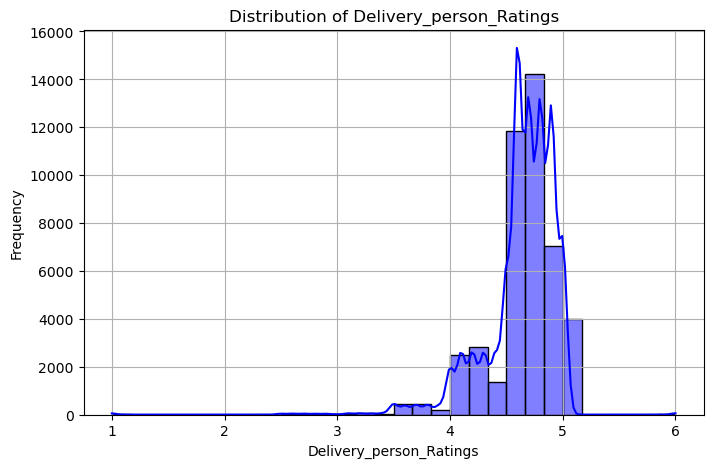

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Delivery_person_Ratings"], bins=30, kde=True, color="blue")
plt.title("Distribution of Delivery_person_Ratings")
plt.xlabel("Delivery_person_Ratings")
plt.ylabel("Frequency")
plt.grid()
plt.show()

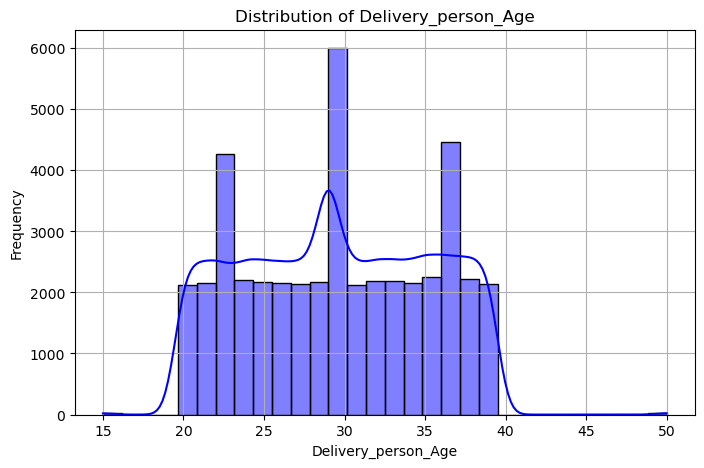

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Delivery_person_Age"], bins=30, kde=True, color="blue")
plt.title("Distribution of Delivery_person_Age")
plt.xlabel("Delivery_person_Age")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [34]:
data2 = data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45162 entries, 0 to 45592
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45162 non-null  object 
 1   Delivery_person_ID           45162 non-null  object 
 2   Delivery_person_Age          45162 non-null  int64  
 3   Delivery_person_Ratings      45162 non-null  float64
 4   Restaurant_latitude          45162 non-null  float64
 5   Restaurant_longitude         45162 non-null  float64
 6   Delivery_location_latitude   45162 non-null  float64
 7   Delivery_location_longitude  45162 non-null  float64
 8   Type_of_order                45162 non-null  object 
 9   Type_of_vehicle              45162 non-null  object 
 10  Time_taken(min)              45162 non-null  int64  
 11  distance                     45162 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 4.5+ MB


In [35]:
data2=data[["ID","Delivery_person_Age","Delivery_person_Ratings","Type_of_order","Type_of_vehicle","Time_taken(min)","distance"]]

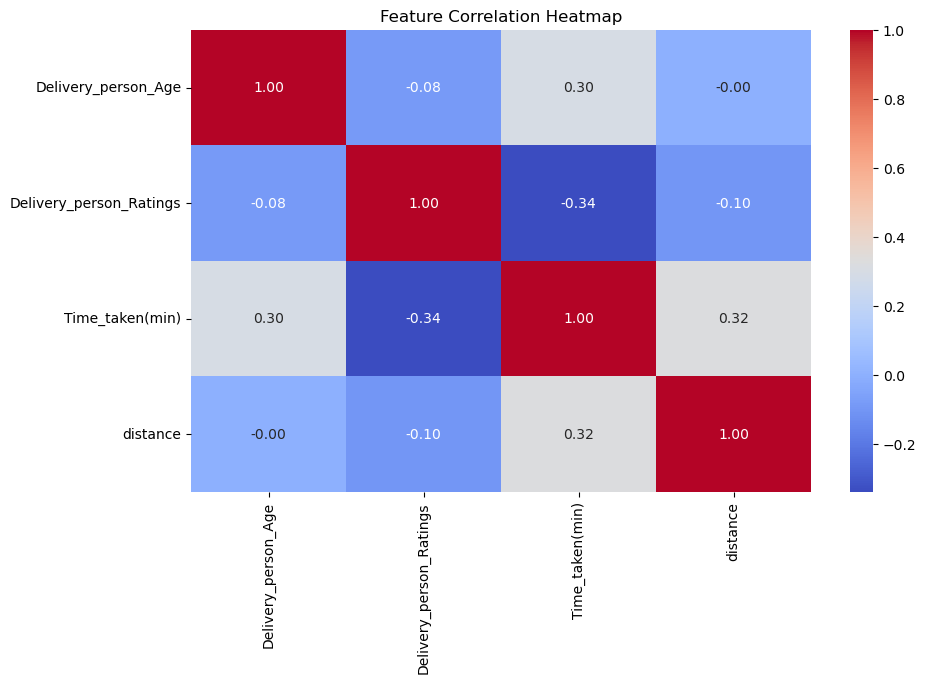

In [36]:
# Correlation Heatmap (only numerical columns)
numeric_data = data2.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [50]:
categorical_columns = ["Type_of_order", "Type_of_vehicle"]
for col in categorical_columns:
    data[col] = data[col].astype(str)  # Ensure it's a string type before encoding
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

C:\Users\rajse\AppData\Local\Temp\ipykernel_17924\4031785284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(str)  # Ensure it's a string type before encoding
C:\Users\rajse\AppData\Local\Temp\ipykernel_17924\4031785284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\rajse\AppData\Local\Temp\ipykernel_17924\4031785284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [51]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ["Type_of_order", "Type_of_vehicle"]
for col in categorical_columns:
    le = LabelEncoder()
    data2[col] = le.fit_transform(data[col])
    label_encoders[col] = le

C:\Users\rajse\AppData\Local\Temp\ipykernel_17924\23280857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col] = le.fit_transform(data[col])
C:\Users\rajse\AppData\Local\Temp\ipykernel_17924\23280857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col] = le.fit_transform(data[col])


In [52]:
data2

,ID,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,37,4.9,3,2,24,3.025149
1,B379,34,4.5,3,3,33,20.183504
2,5D6D,23,4.4,1,2,26,1.552758
3,7A6A,38,4.7,0,2,21,7.790400
4,70A2,32,4.6,3,3,30,6.210137
...,...,...,...,...,...,...,...
45588,7C09,30,4.8,2,2,32,1.489846
45589,D641,21,4.6,0,2,36,11.007731
45590,4F8D,30,4.9,1,3,16,4.657195
45591,5EEE,20,4.7,3,2,26,6.232392


In [53]:
data2.dtypes

ID                          object
Delivery_person_Age          int64
Delivery_person_Ratings    float64
Type_of_order                int64
Type_of_vehicle              int64
Time_taken(min)              int64
distance                   float64
dtype: object

In [39]:
# Print label encoding mapping
for col, le in label_encoders.items():
    print(f"Encoding for {col}:")
    print(dict(zip(le.classes_, le.transform(le.classes_))))
    print()

Encoding for Type_of_order:
{'Buffet ': 0, 'Drinks ': 1, 'Meal ': 2, 'Snack ': 3}

Encoding for Type_of_vehicle:
{'bicycle ': 0, 'electric_scooter ': 1, 'motorcycle ': 2, 'scooter ': 3}



In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
x = data2.drop(columns=['Time_taken(min)','ID'])
y = data2['Time_taken(min)']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [61]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state =42)
dt_model.fit(x_train, y_train)
y_pred =dt_model.predict(x_test)

In [60]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [63]:
# Support Vector Machine Regressor
from sklearn.svm import SVR
svm_model = SVR(kernel='rbf')
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

In [64]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}\n")

In [66]:
# Evaluate all models
evaluate_model(y_test, y_pred, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")

Decision Tree Performance:
Mean Absolute Error: 8.00
Mean Squared Error: 107.45
R² Score: -0.20

Random Forest Performance:
Mean Absolute Error: 6.10
Mean Squared Error: 61.07
R² Score: 0.32

SVM Performance:
Mean Absolute Error: 6.40
Mean Squared Error: 65.43
R² Score: 0.27



In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state =42)

In [74]:
# Reshape data for LSTM input
X_train_lstm = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
X_test_lstm = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [76]:
# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

C:\Users\rajse\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, validation_data=(X_test_lstm, y_test))

# Predict using LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)

Epoch 1/20
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - loss: 140.4883 - val_loss: 86.6792
Epoch 2/20
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - loss: 85.2969 - val_loss: 77.7290
Epoch 3/20
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - loss: 76.2417 - val_loss: 68.9637
Epoch 4/20
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 69.3309 - val_loss: 65.0546
Epoch 5/20
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 66.8560 - val_loss: 67.4044
Epoch 6/20
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 51s 17ms/step - loss: 66.1267 - val_loss: 63.0290
Epoch 7/20
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 34s 14ms/step - loss: 64.0043 - val_loss: 63.5900
Epoch 8/20
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 46s 17ms/step - loss: 64.4765 - val_loss: 62.3198
Epoch 9/20
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 45s 18ms/step - loss: 62.6544 - val_loss: 60.5701
Epoch 10/20
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 101s 27ms/step - loss: 61.6527 - val_loss: 61.4462
Epoch 11/20
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 51s 13ms/step - loss: 61.1557 - va

In [78]:
evaluate_model(y_test, y_pred_lstm, "LSTM")

LSTM Performance:
Mean Absolute Error: 5.91
Mean Squared Error: 56.23
R² Score: 0.37

